# Linear SVC Training

## Python Imports

In [6]:
import pickle

import numpy as np
from ML.Moderation.notebooks.utilities import data, ml_stats, sampling
from ML.Moderation.notebooks.utilities import train_test_split as tts
from ML.Moderation.notebooks.utilities import vectorize
from sklearn.calibration import CalibratedClassifierCV
from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfTransformer,
    TfidfVectorizer,
)
from sklearn.svm import LinearSVC

## Load Data

In [11]:
df = data.neutral()

In [8]:
df_sampled = sampling.undersample(df)

## Training Function

In [9]:
def linsvc(
    X_train,
    y_train,
    X_test,
    name,
    penalty="l2",
    loss="squared_hinge",
    C=1.0,
    max_iter=1000,
):
    svm = LinearSVC(penalty=penalty, loss=loss, C=C, max_iter=max_iter, dual=False)
    clf = CalibratedClassifierCV(svm)
    clf.fit(X_train, y_train.argmax(axis=1))
    pickle.dump(
        clf, open(f"../../models/neutral_models/vectorizers/{name}.pkl", "wb",),
    )
    return clf.predict(X_test), clf

## TF-IDF Vectorizer

### Vectorization

In [10]:
tfidf_vec, vocab = vectorize.tfidf(
    df_sampled["text"], "linearsvc", max_df=0.90, min_df=100, vocab=True
)

Time to vectorize:  19.87
Length of vocabulary: 3041


### Train-Test Splits

In [11]:
y = tts.encode_outputs(df_sampled["class"])

In [12]:
X_train, X_test, y_train, y_test = tts.split(tfidf_vec, y)

### Training

In [13]:
y_pred, model = linsvc(
    X_train, y_train, X_test, "linearsvc_tfidf", penalty="l1", C=10.0
)

### Metrics

In [14]:
ml_stats.class_accuracies(y_test, y_pred)

Class 1 Accuracy: 0.8087809226654781
Class 0 Accuracy: 0.9810217367317665


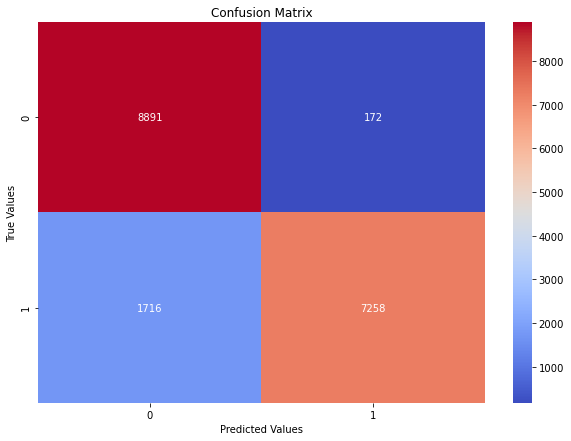

In [15]:
ml_stats.confusion_matrix_plot(y_test, y_pred, 2)

In [16]:
ml_stats.stats(y_test, y_pred, 2)


Accuracy: 0.90

Micro Precision: 0.90
Micro Recall: 0.90
Micro F1-score: 0.90

Macro Precision: 0.91
Macro Recall: 0.89
Macro F1-score: 0.89

Weighted Precision: 0.91
Weighted Recall: 0.90
Weighted F1-score: 0.89

Classification Report

              precision    recall  f1-score   support

     Class 0       0.84      0.98      0.90      9063
     Class 1       0.98      0.81      0.88      8974

    accuracy                           0.90     18037
   macro avg       0.91      0.89      0.89     18037
weighted avg       0.91      0.90      0.89     18037



### Personal Test

In [17]:
vocab_tfidf = pickle.load(
    open("../../models/neutral_models/vectorizers/linearsvc_tfidf_features.pkl", "rb")
)
transformer = TfidfTransformer()
loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=vocab_tfidf)
test_tfidf = transformer.fit_transform(
    loaded_vec.fit_transform(
        np.array(
            [
                "what are you a homo",
                "I love you",
                "I go to the mall",
                "fuck your mom bitch",
                "hello",
                "I have food",
                "you are gay as fuck",
                "niggers",
                "blessjesus",
            ]
        )
    )
)
preds = model.predict(test_tfidf.toarray())
print(preds)

[1 0 0 1 0 0 1 0 0]


## Count Vectorizer

### Vectorization

In [18]:
count_vec, vocab = vectorize.count(
    df_sampled["text"], "linearsvc", max_df=0.90, min_df=100, vocab=True
)

Time to vectorize:  18.62
Length of vocabulary: 3041


### Train-Test Split

In [19]:
y = tts.encode_outputs(df_sampled["class"])

In [20]:
X_train, X_test, y_train, y_test = tts.split(count_vec, y)

### Training

In [21]:
y_pred, model = linsvc(
    X_train, y_train, X_test, "linearsvc_count", penalty="l2", C=100.0
)

### Metrics

In [22]:
ml_stats.class_accuracies(y_test, y_pred)

Class 1 Accuracy: 0.4533095609538667
Class 0 Accuracy: 0.9968001765419839


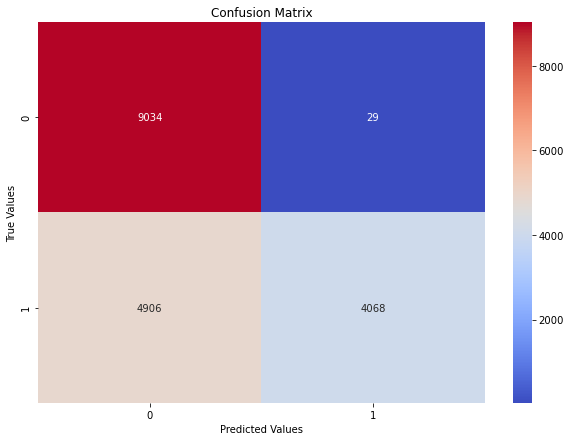

In [23]:
ml_stats.confusion_matrix_plot(y_test, y_pred, 2)

In [24]:
ml_stats.stats(y_test, y_pred, 2)


Accuracy: 0.73

Micro Precision: 0.73
Micro Recall: 0.73
Micro F1-score: 0.73

Macro Precision: 0.82
Macro Recall: 0.73
Macro F1-score: 0.70

Weighted Precision: 0.82
Weighted Recall: 0.73
Weighted F1-score: 0.70

Classification Report

              precision    recall  f1-score   support

     Class 0       0.65      1.00      0.79      9063
     Class 1       0.99      0.45      0.62      8974

    accuracy                           0.73     18037
   macro avg       0.82      0.73      0.70     18037
weighted avg       0.82      0.73      0.70     18037



### Personal Test

In [25]:
vocab_tfidf = pickle.load(
    open("../../models/neutral_models/vectorizers/linearsvc_count_features.pkl", "rb")
)
loaded_vec = CountVectorizer(decode_error="replace", vocabulary=vocab_tfidf)
test_tfidf = loaded_vec.fit_transform(
    np.array(
        [
            "what are you a homo",
            "I love you",
            "I go to the mall",
            "fuck your mom bitch",
            "hello",
            "I have food",
            "you are gay as fuck",
            "niggers",
            "blessjesus",
        ]
    )
)

preds = model.predict(test_tfidf.toarray())
# print(preds.argmax(axis=1))
print(preds)

[0 0 0 1 0 0 1 0 0]
